## 项目的历史轨迹分析

In [1]:
// 引入OpenDigger
var openDigger = require('../src/open_digger');

In [3]:
// 查看所有的数据库
var query = openDigger.driver.clickhouse.query;
query(    
    `SHOW DATABASES`
).then(
    res=>{  console.log(res); }
)

[
  { name: '_temporary_and_external_tables' },
  { name: 'default' },
  { name: 'github_log' },
  { name: 'system' }
]


In [4]:
// 查看数据库中所有的表
query(
    `SHOW TABLES from github_log`
).then(res=>{
    console.log(res);
})

[
  { name: 'year2015' },
  { name: 'year2016' },
  { name: 'year2017' },
  { name: 'year2018' },
  { name: 'year2019' },
  { name: 'year2020' },
  { name: 'year2021' },
  { name: 'year2022' }
]


### 1.1每月新增 Star 的个数

[
  { m: '2017-01', cnt: '2' },
  { m: '2017-02', cnt: '140' },
  { m: '2017-03', cnt: '1436' },
  { m: '2017-04', cnt: '861' },
  { m: '2017-05', cnt: '827' },
  { m: '2017-06', cnt: '692' },
  { m: '2017-07', cnt: '603' },
  { m: '2017-08', cnt: '621' },
  { m: '2017-09', cnt: '645' },
  { m: '2017-10', cnt: '596' },
  { m: '2017-11', cnt: '509' },
  { m: '2017-12', cnt: '598' },
  { m: '2018-01', cnt: '742' },
  { m: '2018-02', cnt: '433' },
  { m: '2018-03', cnt: '555' },
  { m: '2018-04', cnt: '444' },
  { m: '2018-05', cnt: '481' },
  { m: '2018-06', cnt: '386' },
  { m: '2018-07', cnt: '293' },
  { m: '2018-08', cnt: '263' },
  { m: '2018-09', cnt: '229' },
  { m: '2018-10', cnt: '217' },
  { m: '2018-11', cnt: '289' },
  { m: '2018-12', cnt: '231' },
  { m: '2019-01', cnt: '253' },
  { m: '2019-02', cnt: '202' },
  { m: '2019-03', cnt: '267' },
  { m: '2019-04', cnt: '248' },
  { m: '2019-05', cnt: '214' },
  { m: '2019-06', cnt: '191' },
  { m: '2019-07', cnt: '183' },
  { m: 

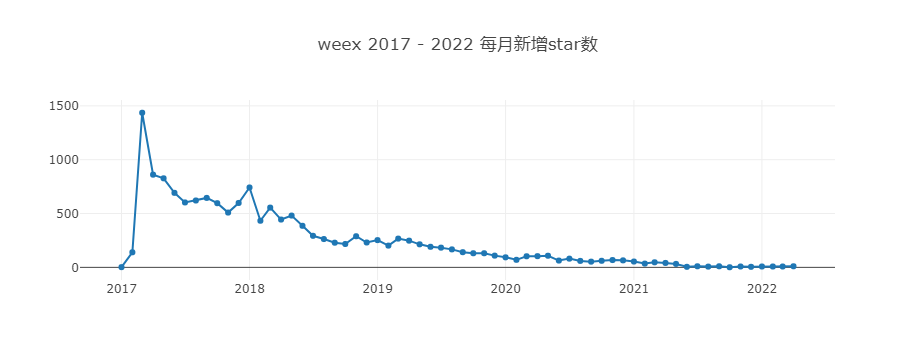

In [6]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
// 根据项目名称为incubator-weex、时间从2017-2022年、类型为WatchEvent获取每月项目的star个数
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'apache/incubator-weex'
    and type='WatchEvent'
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d => d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `weex ${startYear} - ${endYear} 每月新增star数`});  
})

### 1.2 每月新增 Frok 的个数

[
  { m: '2017-01', cnt: '1' },
  { m: '2017-02', cnt: '23' },
  { m: '2017-03', cnt: '215' },
  { m: '2017-04', cnt: '108' },
  { m: '2017-05', cnt: '110' },
  { m: '2017-06', cnt: '85' },
  { m: '2017-07', cnt: '84' },
  { m: '2017-08', cnt: '96' },
  { m: '2017-09', cnt: '94' },
  { m: '2017-10', cnt: '79' },
  { m: '2017-11', cnt: '73' },
  { m: '2017-12', cnt: '89' },
  { m: '2018-01', cnt: '93' },
  { m: '2018-02', cnt: '63' },
  { m: '2018-03', cnt: '84' },
  { m: '2018-04', cnt: '71' },
  { m: '2018-05', cnt: '73' },
  { m: '2018-06', cnt: '50' },
  { m: '2018-07', cnt: '50' },
  { m: '2018-08', cnt: '37' },
  { m: '2018-09', cnt: '35' },
  { m: '2018-10', cnt: '45' },
  { m: '2018-11', cnt: '50' },
  { m: '2018-12', cnt: '38' },
  { m: '2019-01', cnt: '38' },
  { m: '2019-02', cnt: '28' },
  { m: '2019-03', cnt: '36' },
  { m: '2019-04', cnt: '45' },
  { m: '2019-05', cnt: '27' },
  { m: '2019-06', cnt: '41' },
  { m: '2019-07', cnt: '37' },
  { m: '2019-08', cnt: '28' },
  { 

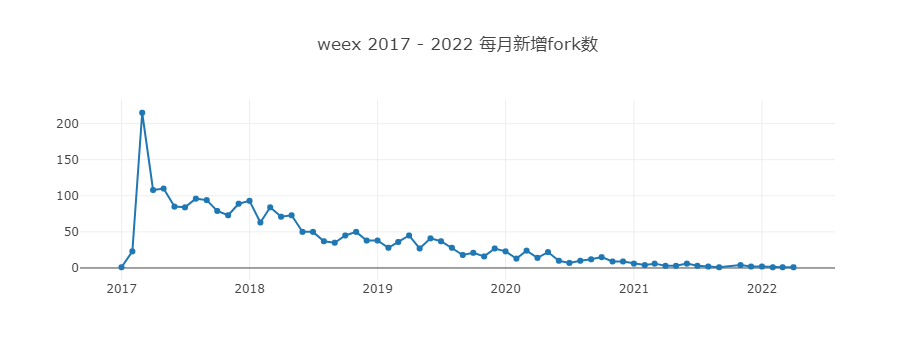

In [7]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
// 根据项目名称为incubator-weex、时间从2017-2022年、类型为ForkEvent获取每月项目的fork个数
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'apache/incubator-weex'
    and type='ForkEvent'
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d => d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `weex ${startYear} - ${endYear} 每月新增fork数`});  
})

### 2.1 每月打开 Issue 的个数

[
  { m: '2018-08', cnt: '19' },
  { m: '2018-09', cnt: '29' },
  { m: '2018-10', cnt: '31' },
  { m: '2018-11', cnt: '63' },
  { m: '2018-12', cnt: '57' },
  { m: '2019-01', cnt: '44' },
  { m: '2019-02', cnt: '41' },
  { m: '2019-03', cnt: '63' },
  { m: '2019-04', cnt: '67' },
  { m: '2019-05', cnt: '54' },
  { m: '2019-06', cnt: '64' },
  { m: '2019-07', cnt: '55' },
  { m: '2019-08', cnt: '45' },
  { m: '2019-09', cnt: '25' },
  { m: '2019-10', cnt: '18' },
  { m: '2019-11', cnt: '29' },
  { m: '2019-12', cnt: '35' },
  { m: '2020-01', cnt: '22' },
  { m: '2020-02', cnt: '28' },
  { m: '2020-03', cnt: '17' },
  { m: '2020-04', cnt: '22' },
  { m: '2020-05', cnt: '13' },
  { m: '2020-06', cnt: '12' },
  { m: '2020-07', cnt: '8' },
  { m: '2020-08', cnt: '11' },
  { m: '2020-09', cnt: '6' },
  { m: '2020-10', cnt: '11' },
  { m: '2020-11', cnt: '8' },
  { m: '2020-12', cnt: '13' },
  { m: '2021-01', cnt: '7' },
  { m: '2021-02', cnt: '5' },
  { m: '2021-03', cnt: '2' },
  { m: '2021

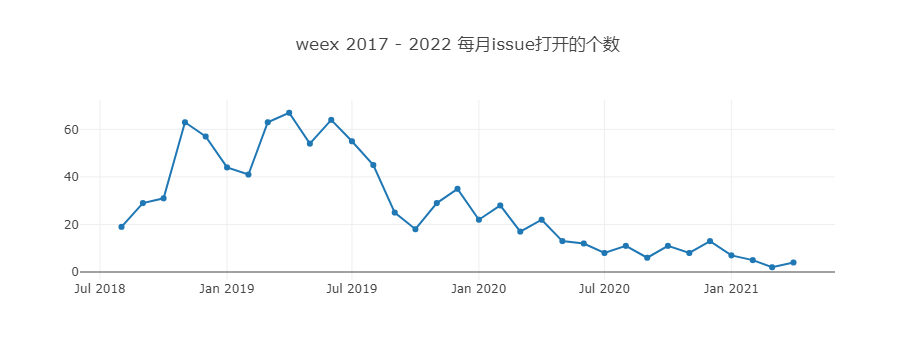

In [8]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
// 根据项目名称为incubator-weex、时间从2017-2022年、类型为IssuesEvent、行为包括opened和reopened获取每月打开Issue的个数
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'apache/incubator-weex'
    and type='IssuesEvent'
    and action in ['opened', 'reopened']
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `weex ${startYear} - ${endYear} 每月issue打开的个数`});  
})

### 2.2 每月关闭 Issue 的个数

[
  { m: '2018-08', cnt: '9' },
  { m: '2018-09', cnt: '14' },
  { m: '2018-10', cnt: '23' },
  { m: '2018-11', cnt: '47' },
  { m: '2018-12', cnt: '48' },
  { m: '2019-01', cnt: '30' },
  { m: '2019-02', cnt: '85' },
  { m: '2019-03', cnt: '58' },
  { m: '2019-04', cnt: '50' },
  { m: '2019-05', cnt: '64' },
  { m: '2019-06', cnt: '62' },
  { m: '2019-07', cnt: '32' },
  { m: '2019-08', cnt: '13' },
  { m: '2019-09', cnt: '27' },
  { m: '2019-10', cnt: '33' },
  { m: '2019-11', cnt: '28' },
  { m: '2019-12', cnt: '26' },
  { m: '2020-01', cnt: '10' },
  { m: '2020-02', cnt: '10' },
  { m: '2020-03', cnt: '6' },
  { m: '2020-04', cnt: '6' },
  { m: '2020-05', cnt: '3' },
  { m: '2020-06', cnt: '1' },
  { m: '2020-09', cnt: '2' },
  { m: '2020-11', cnt: '6' },
  { m: '2020-12', cnt: '3' },
  { m: '2021-01', cnt: '5' }
]


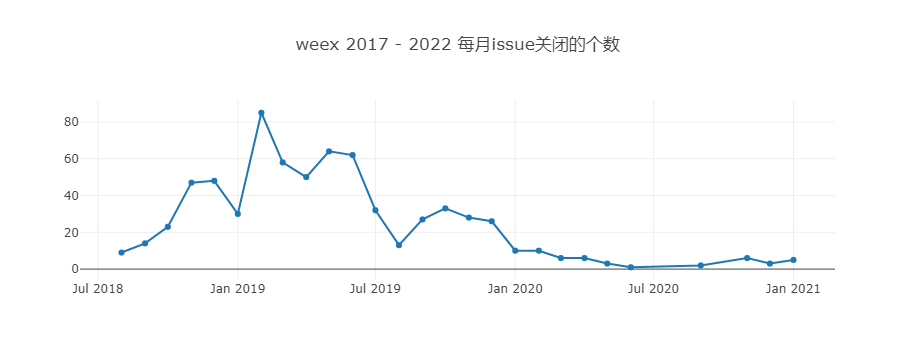

In [9]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
// 根据项目名称为incubator-weex、时间从2017-2022年、类型为IssuesEvent、行为为closed获取每月关闭Issue的个数
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'apache/incubator-weex'
    and type='IssuesEvent'
    and action='closed'
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `weex ${startYear} - ${endYear} 每月issue关闭的个数`});  
})

### 3.1 每月打开 PR 的个数

[
  { m: '2017-01', cnt: '1' },
  { m: '2017-02', cnt: '4' },
  { m: '2017-03', cnt: '203' },
  { m: '2017-04', cnt: '95' },
  { m: '2017-05', cnt: '104' },
  { m: '2017-06', cnt: '77' },
  { m: '2017-07', cnt: '74' },
  { m: '2017-08', cnt: '109' },
  { m: '2017-09', cnt: '88' },
  { m: '2017-10', cnt: '67' },
  { m: '2017-11', cnt: '95' },
  { m: '2017-12', cnt: '41' },
  { m: '2018-01', cnt: '43' },
  { m: '2018-02', cnt: '33' },
  { m: '2018-03', cnt: '49' },
  { m: '2018-04', cnt: '41' },
  { m: '2018-05', cnt: '78' },
  { m: '2018-06', cnt: '69' },
  { m: '2018-07', cnt: '74' },
  { m: '2018-08', cnt: '75' },
  { m: '2018-09', cnt: '70' },
  { m: '2018-10', cnt: '43' },
  { m: '2018-11', cnt: '86' },
  { m: '2018-12', cnt: '62' },
  { m: '2019-01', cnt: '51' },
  { m: '2019-02', cnt: '32' },
  { m: '2019-03', cnt: '36' },
  { m: '2019-04', cnt: '52' },
  { m: '2019-05', cnt: '63' },
  { m: '2019-06', cnt: '61' },
  { m: '2019-07', cnt: '84' },
  { m: '2019-08', cnt: '55' },
  { m

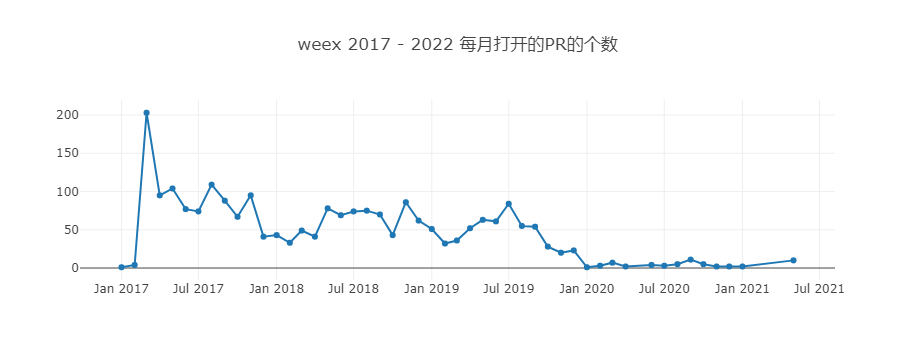

In [10]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
// 根据项目名称为incubator-weex、时间从2017-2022年、类型为PullRequestEvent、行为为opened获取每月打开PR的个数
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'apache/incubator-weex'
    and type='PullRequestEvent'
    and action= 'opened'
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `weex ${startYear} - ${endYear} 每月打开的PR的个数`});  
})

### 3.2 每月合入 PR 的个数

[
  { m: '2017-03', cnt: '138' },
  { m: '2017-04', cnt: '87' },
  { m: '2017-05', cnt: '82' },
  { m: '2017-06', cnt: '69' },
  { m: '2017-07', cnt: '55' },
  { m: '2017-08', cnt: '96' },
  { m: '2017-09', cnt: '77' },
  { m: '2017-10', cnt: '33' },
  { m: '2017-11', cnt: '42' },
  { m: '2017-12', cnt: '6' },
  { m: '2018-01', cnt: '15' },
  { m: '2018-02', cnt: '15' },
  { m: '2018-03', cnt: '22' },
  { m: '2018-04', cnt: '21' },
  { m: '2018-05', cnt: '28' },
  { m: '2018-06', cnt: '26' },
  { m: '2018-07', cnt: '27' },
  { m: '2018-08', cnt: '68' },
  { m: '2018-09', cnt: '67' },
  { m: '2018-10', cnt: '32' },
  { m: '2018-11', cnt: '78' },
  { m: '2018-12', cnt: '53' },
  { m: '2019-01', cnt: '51' },
  { m: '2019-02', cnt: '27' },
  { m: '2019-03', cnt: '19' },
  { m: '2019-04', cnt: '51' },
  { m: '2019-05', cnt: '57' },
  { m: '2019-06', cnt: '53' },
  { m: '2019-07', cnt: '69' },
  { m: '2019-08', cnt: '47' },
  { m: '2019-09', cnt: '44' },
  { m: '2019-10', cnt: '23' },
  { m:

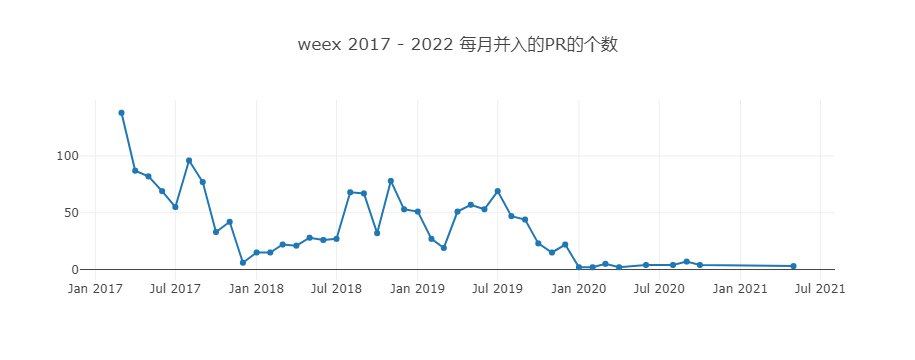

In [11]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
// 根据项目名称为incubator-weex、时间从2017-2022年、类型为PullRequestEvent、具备pull_merged获取每月合入PR的个数
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'apache/incubator-weex'
    and type='PullRequestEvent'
    and pull_merged=1
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `weex ${startYear} - ${endYear} 每月并入的PR的个数`});  
})

### 4 每月在仓库中活跃（只要有日志产生就算）的不同开发者（也就是一个 GitHub 账号）总数

[
  { m: '2017-01', cnt: '1' },
  { m: '2017-02', cnt: '4' },
  { m: '2017-03', cnt: '46' },
  { m: '2017-04', cnt: '37' },
  { m: '2017-05', cnt: '33' },
  { m: '2017-06', cnt: '29' },
  { m: '2017-07', cnt: '31' },
  { m: '2017-08', cnt: '37' },
  { m: '2017-09', cnt: '33' },
  { m: '2017-10', cnt: '22' },
  { m: '2017-11', cnt: '26' },
  { m: '2017-12', cnt: '24' },
  { m: '2018-01', cnt: '18' },
  { m: '2018-02', cnt: '14' },
  { m: '2018-03', cnt: '21' },
  { m: '2018-04', cnt: '23' },
  { m: '2018-05', cnt: '25' },
  { m: '2018-06', cnt: '27' },
  { m: '2018-07', cnt: '27' },
  { m: '2018-08', cnt: '42' },
  { m: '2018-09', cnt: '49' },
  { m: '2018-10', cnt: '46' },
  { m: '2018-11', cnt: '88' },
  { m: '2018-12', cnt: '84' },
  { m: '2019-01', cnt: '69' },
  { m: '2019-02', cnt: '64' },
  { m: '2019-03', cnt: '82' },
  { m: '2019-04', cnt: '82' },
  { m: '2019-05', cnt: '75' },
  { m: '2019-06', cnt: '70' },
  { m: '2019-07', cnt: '65' },
  { m: '2019-08', cnt: '67' },
  { m: '

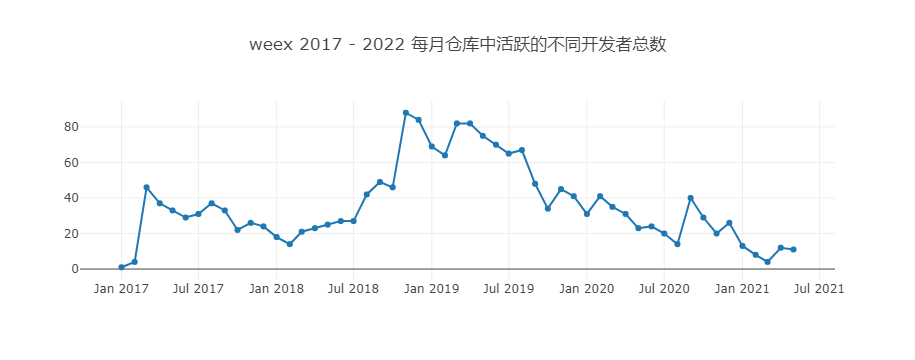

In [12]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
// 根据项目名称为incubator-weex、时间从2017-2022年的不同actor_id的总数
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(distinct actor_id) as cnt
    from github_log.year${year} 
    where repo_name = 'apache/incubator-weex'
    and type in ['IssueCommentEvent', 'IssuesEvent', 'PullRequestEvent', 'PullRequestReviewCommentEvent']
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `weex ${startYear} - ${endYear} 每月仓库中活跃的不同开发者总数`});  
})